# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
# Creating a dataframe
import pandas as pd
twitter_archive_data = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive_data.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [2]:
# Using requests to download the data
import requests
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url, auth=('user', 'pass'))

# Using BeautifulSoup library to make the data to be readable
from bs4 import BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')
soup

# Writing the data to a file
with open('image-predictions.tsv', 'w') as file:
    file.writelines(soup)

# Creating a dataframe
image_predictions_data = pd.read_csv('image-predictions.tsv', sep='\t')
image_predictions_data.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = '---'
consumer_secret = '---'
access_token = '---'
access_secret = '---'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_archive_data.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [3]:
import glob
import pandas as pd
import json
# List of dictionaries to build file by file and later convert to a DataFrame
df_list = []
for tweets in glob.glob('*.txt'):
    with open(tweets, encoding='utf-8') as file:
        for line in file:
            tweet = json.loads(line[:-1])
            # Append to list of dictionaries
            df_list.append({'tweet_id': tweet['id'],
                        'retweet_count': tweet['retweet_count'],
                        'favorite_count': tweet['favorite_count']})
twitter_API_data = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])
twitter_API_data.head(5)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6934,33193
1,892177421306343426,5236,28685
2,891815181378084864,3448,21574
3,891689557279858688,7146,36158
4,891327558926688256,7676,34594


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [6]:
twitter_archive_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [7]:
image_predictions_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [8]:
twitter_API_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2325 entries, 0 to 2324
Data columns (total 3 columns):
tweet_id          2325 non-null int64
retweet_count     2325 non-null int64
favorite_count    2325 non-null int64
dtypes: int64(3)
memory usage: 54.6 KB


In [9]:
twitter_archive_data['source'].head(5)

0    <a href="http://twitter.com/download/iphone" r...
1    <a href="http://twitter.com/download/iphone" r...
2    <a href="http://twitter.com/download/iphone" r...
3    <a href="http://twitter.com/download/iphone" r...
4    <a href="http://twitter.com/download/iphone" r...
Name: source, dtype: object

In [10]:
twitter_archive_data['text'][0]

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"

### Quality issues
1. There is some missing data in the twitter archive dataset

2. There are retweets included in the twitter archive dataset

3. There are replies included in the twitter archive dataset

4. Some of the tweets are not about dogs

5. The naming convention of the dog names in columns p1, p2 and p3 of the image predictions dataset are not consistent

6. The id columns for all 3 datasets are of type integer instead of type string

7. Timestamp is of type object

8. The source column for the twitter archive dataset is in html format

9. Some records in one dataset are not found in other datasets

10. There are original tweets without expanded urls in the twitter archive dataset

### Tidiness issues
1. The twitter archive dataset should have one column for dog stage

2. Text and the url are in the same column and need to be seperated, the rating needs to be removed

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [11]:
# Make copies of original pieces of data
twitter_archive = twitter_archive_data.copy()
image_predictions = image_predictions_data.copy()
twitter_API = twitter_API_data.copy()

### Issue #1: There are replies included in the twitter archive dataset

#### Define: Remove replies in the twitter archive dataset by dropping rows with values in column *in_reply_to_status_id*

#### Code

In [12]:
# Removing rows with values in column in_reply_to_status_id
twit_arch1 = twitter_archive[twitter_archive['in_reply_to_status_id'].isna()]

#### Test

In [13]:
"""
All the rows in column in_reply_to_status_id with values which are replies 
have been removed which can be seen by the columns in_reply_to_status_id and
in_reply_to_user_id having zero entries
"""
twit_arch1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2278 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2278 non-null object
source                        2278 non-null object
text                          2278 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2274 non-null object
rating_numerator              2278 non-null int64
rating_denominator            2278 non-null int64
name                          2278 non-null object
doggo                         2278 non-null object
floofer                       2278 non-null object
pupper                        2278 non-null object
puppo                         2278 non-null object
dtypes: float64(4), int64(3), obje

### Issue #2: There are retweets included in the twitter archive dataset

#### Define: Remove retweets in the twitter archive dataset by dropping rows with values in column *retweeted_status_id*

#### Code

In [14]:
# Removing rows with values in column retweeted_status_id
twit_arch2 = twit_arch1[twit_arch1['retweeted_status_id'].isna()]

#### Test

In [15]:
"""
All the rows in column retweeted_status_id with values which are replies 
have been removed which can be seen by the columns retweeted_status_id,
retweeted_status_user_id and retweeted_status_timestamp having zero entries
"""
twit_arch2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: float64(4), int64(3), object(10)

### Issue #3: There are original tweets without expanded urls in the twitter archive dataset

#### Define: Remove rows with no expanded urls

#### Code

In [16]:
# Removing rows with no expanded urls
twit_arch3 = twit_arch2[twit_arch2['expanded_urls'].notna()]

#### Test

In [17]:
"""
All the rows with no expanded urls have been removed 
"""
twit_arch3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2094 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2094 non-null object
source                        2094 non-null object
text                          2094 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2094 non-null int64
rating_denominator            2094 non-null int64
name                          2094 non-null object
doggo                         2094 non-null object
floofer                       2094 non-null object
pupper                        2094 non-null object
puppo                         2094 non-null object
dtypes: float64(4), int64(3), object(10)

### Issue #4: There is some missing data in the twitter archive dataset

#### Define: Remove columns with missing data in the twitter archive dataset using the drop function

#### Code

In [18]:
# Removing all columns with no values in them
cols=['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']
twit_arch4=twit_arch3.drop(columns=cols)

#### Test

In [19]:
# All columns with no values in them have been removed
twit_arch4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2094 non-null int64
timestamp             2094 non-null object
source                2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2094 non-null int64
rating_denominator    2094 non-null int64
name                  2094 non-null object
doggo                 2094 non-null object
floofer               2094 non-null object
pupper                2094 non-null object
puppo                 2094 non-null object
dtypes: int64(3), object(9)
memory usage: 212.7+ KB


### Issue #5: The naming convention of the dog names in columns p1, p2 and p3 of the image predictions dataset are not consistent

#### Define: Changing the naming conventions to lowercase for columns p1, p2 and p3 

#### Code

In [20]:
# Changing the naming convention for columns p1, p2 and p3 to lowercase
image_predictions['p1']=[pred.lower() for pred in image_predictions['p1']]
image_predictions['p2']=[pred.lower() for pred in image_predictions['p2']]
image_predictions['p3']=[pred.lower() for pred in image_predictions['p3']]

#### Test

In [21]:
# All the dog names have been changed to lowercase
image_predictions.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


### Issue #6: The id columns for all 3 datasets are of type integer instead of type string

#### Define: Converting the datatype of the id columns in all 3 datasets to type string

#### Code

In [22]:
"""
Converting the datatype of the id columns in all 3 datasets to type string
"""
twit_arch4['tweet_id'] = twit_arch4['tweet_id'].astype(str)
image_predictions['tweet_id'] = image_predictions['tweet_id'].astype(str)
twitter_API['tweet_id'] = twitter_API['tweet_id'].astype(str)

#### Test

In [23]:
"""
The id columns of all 3 datasets have been converted to type string
"""
print(twit_arch4.info())
print('-'*50)
print(image_predictions.info())
print('-'*50)
print(twitter_API.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2094 non-null object
timestamp             2094 non-null object
source                2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2094 non-null int64
rating_denominator    2094 non-null int64
name                  2094 non-null object
doggo                 2094 non-null object
floofer               2094 non-null object
pupper                2094 non-null object
puppo                 2094 non-null object
dtypes: int64(2), object(10)
memory usage: 212.7+ KB
None
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float6

### Issue #7: The source column for the twitter archive dataset is in html format

#### Define: Extract text from the html format using the BeautifulSoup library

#### Code

In [24]:
# Extracting text from html
source_text = []
from bs4 import BeautifulSoup
for index, html in enumerate(twit_arch4['source']):
    text = BeautifulSoup(html, 'html.parser').find('a').getText()
    source_text.append(text)

twit_arch5 = twit_arch4.copy()
twit_arch5['source'] = source_text

#### Test

In [25]:
# Text has been extracted from html
twit_arch5['source'].value_counts()

Twitter for iPhone     1962
Vine - Make a Scene      91
Twitter Web Client       30
TweetDeck                11
Name: source, dtype: int64

### Issue #8: Timestamp is of type object

#### Define: Convert timestamp object to datetime

#### Code

In [26]:
# Converting timestamp object to datetime
twit_arch6 = twit_arch5.copy()
twit_arch6['timestamp'] = pd.to_datetime(twit_arch6['timestamp'])

#### Test

In [27]:
# Timestamp has been converted to datetime
twit_arch6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2094 non-null object
timestamp             2094 non-null datetime64[ns]
source                2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2094 non-null int64
rating_denominator    2094 non-null int64
name                  2094 non-null object
doggo                 2094 non-null object
floofer               2094 non-null object
pupper                2094 non-null object
puppo                 2094 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 212.7+ KB


### Issue #9: Some of the tweets are not about dogs

#### Define: Remove tweets which are not about dogs

#### Code

In [28]:
# Remove any row with predictions which are not dogs for eithe of the 3 predictions
img_pred1=image_predictions[image_predictions['p1_dog']&image_predictions['p2_dog']&image_predictions['p3_dog']]

#### Test

In [29]:
print(img_pred1['p1_dog'].unique())
print(img_pred1['p2_dog'].unique())
print(img_pred1['p3_dog'].unique())

[ True]
[ True]
[ True]


### Issue #10: The twitter archive dataset should have one column for dog stage

#### Define: Combining the doggo, floofer, pupper and puppo columns into one column for dog stages

#### Code

In [30]:
"""
Combining the columns into one column
"""
stages = []
for index in twit_arch6.index:
    if (twit_arch6['doggo'][index] == 'doggo'):
        stages.append('doggo')
    elif twit_arch6['floofer'][index] == 'floofer':
        stages.append('floofer')
    elif twit_arch6['pupper'][index] == 'pupper':
        stages.append('pupper')
    elif twit_arch6['puppo'][index] == 'puppo':
        stages.append('puppo')
    else:
        stages.append('None')


twit_arch6['dog_stages'] = stages
twit_arch7 = twit_arch6.drop(columns=['doggo','floofer','pupper','puppo'])

#### Test

In [31]:
print(twit_arch7['dog_stages'].unique())
print('-'*50)
print(twit_arch7.info())

['None' 'doggo' 'puppo' 'pupper' 'floofer']
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2094 non-null object
timestamp             2094 non-null datetime64[ns]
source                2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2094 non-null int64
rating_denominator    2094 non-null int64
name                  2094 non-null object
dog_stages            2094 non-null object
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 243.6+ KB
None


### Issue #11: Text and the url are in the same column and need to be seperated, the rating needs to be removed

#### Define: Separate text and url to create two columns for text and url

#### Code

In [32]:
"""
Using regular expressions to extract urls from the text
Using regular expressions to remove urls and ratings from text
"""
import re
urls = []
texts = []
for index in twit_arch7.index:
    url = re.search('https.*', twit_arch7['text'][index])[0]
    text_ = re.sub('(https.*|\d+\/\d+)', '', twit_arch7['text'][index]).strip()
    urls.append(url)
    texts.append(text_)
twit_arch8 = twit_arch7.copy()
twit_arch8['url']=urls
twit_arch8['text']=texts

#### Test

In [33]:
print(twit_arch8['text'][0])
print('-'*50)
print(twit_arch8['url'].head(2))
print('-'*50)
print(twit_arch8.info())

This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut.
--------------------------------------------------
0    https://t.co/MgUWQ76dJU
1    https://t.co/0Xxu71qeIV
Name: url, dtype: object
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2094 non-null object
timestamp             2094 non-null datetime64[ns]
source                2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2094 non-null int64
rating_denominator    2094 non-null int64
name                  2094 non-null object
dog_stages            2094 non-null object
url                   2094 non-null object
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 260.0+ KB
None


### Issue #12: Some records in one dataset are not found in other datasets

#### Define: Merge the three datasets to remove any records which are not common

#### Code

In [34]:
"""
Merging the 3 dataframes together to only remain with common records
"""
dfs = [twit_arch8, img_pred1, twitter_API]
import functools as ft
df_final = ft.reduce(lambda left, right: pd.merge(left, right, on='tweet_id'), dfs)

#### Test

In [35]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1187 entries, 0 to 1186
Data columns (total 23 columns):
tweet_id              1187 non-null object
timestamp             1187 non-null datetime64[ns]
source                1187 non-null object
text                  1187 non-null object
expanded_urls         1187 non-null object
rating_numerator      1187 non-null int64
rating_denominator    1187 non-null int64
name                  1187 non-null object
dog_stages            1187 non-null object
url                   1187 non-null object
jpg_url               1187 non-null object
img_num               1187 non-null int64
p1                    1187 non-null object
p1_conf               1187 non-null float64
p1_dog                1187 non-null bool
p2                    1187 non-null object
p2_conf               1187 non-null float64
p2_dog                1187 non-null bool
p3                    1187 non-null object
p3_conf               1187 non-null float64
p3_dog                1187 no

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [36]:
df_final.to_csv('twitter_archive_master.csv',index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [37]:
# Loading the combined dataset
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1187 entries, 0 to 1186
Data columns (total 23 columns):
tweet_id              1187 non-null int64
timestamp             1187 non-null object
source                1187 non-null object
text                  1187 non-null object
expanded_urls         1187 non-null object
rating_numerator      1187 non-null int64
rating_denominator    1187 non-null int64
name                  1187 non-null object
dog_stages            1187 non-null object
url                   1187 non-null object
jpg_url               1187 non-null object
img_num               1187 non-null int64
p1                    1187 non-null object
p1_conf               1187 non-null float64
p1_dog                1187 non-null bool
p2                    1187 non-null object
p2_conf               1187 non-null float64
p2_dog                1187 non-null bool
p3                    1187 non-null object
p3_conf               1187 non-null float64
p3_dog                1187 non-null bo

In [38]:
# Converting the timestamp column to datetime
twitter_archive_master['timestamp']=pd.to_datetime(twitter_archive_master['timestamp'])
# Converting the tweet id column to string
twitter_archive_master['tweet_id']=twitter_archive_master['tweet_id'].astype(str)
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1187 entries, 0 to 1186
Data columns (total 23 columns):
tweet_id              1187 non-null object
timestamp             1187 non-null datetime64[ns]
source                1187 non-null object
text                  1187 non-null object
expanded_urls         1187 non-null object
rating_numerator      1187 non-null int64
rating_denominator    1187 non-null int64
name                  1187 non-null object
dog_stages            1187 non-null object
url                   1187 non-null object
jpg_url               1187 non-null object
img_num               1187 non-null int64
p1                    1187 non-null object
p1_conf               1187 non-null float64
p1_dog                1187 non-null bool
p2                    1187 non-null object
p2_conf               1187 non-null float64
p2_dog                1187 non-null bool
p3                    1187 non-null object
p3_conf               1187 non-null float64
p3_dog                1187 no

In [39]:
# Checking for the year which got the most retweets on average
twitter_archive_master.groupby(twitter_archive_master['timestamp'].dt.year).mean()['retweet_count']

timestamp
2015     733.100287
2016    2006.473422
2017    4879.266949
Name: retweet_count, dtype: float64

In [40]:
# Checking for the month which got the most favorites on average
twitter_archive_master.groupby(twitter_archive_master['timestamp'].dt.month).mean()['favorite_count']

timestamp
1      7396.463087
2      6970.990654
3      7378.134615
4     10963.551724
5     14409.966667
6     15434.921053
7     15217.337349
8      8192.972973
9      8818.309524
10    10157.000000
11     2949.858586
12     4793.112069
Name: favorite_count, dtype: float64

In [41]:
# Checking for the most common source for tweets
twitter_archive_master['source'].value_counts()

Twitter for iPhone    1169
Twitter Web Client      14
TweetDeck                4
Name: source, dtype: int64

In [42]:
# Checking the distribution of the dog stages
twitter_archive_master['dog_stages'].value_counts()

None       999
pupper     119
doggo       45
puppo       18
floofer      6
Name: dog_stages, dtype: int64

### Insights:
1. On average the number of retweets in 2017 where more than twice as much as the retweets in 2016 and more than 6 times the retweets in 2015. This shows how the page has become more popular as the time progresses.

2. The month with the most average number of favorites is the month of July with the least average number of favorites November. Since the twitter account used is based in the US, it can be assumed that most of the people who interact with the account are from the US. By following this assumption it can be seen that on average Summer months which are June, July and August in the US have more average number of favorites as compared to the winter months in the US which are December, January and February.

3. More than 98% of the tweets that were posted on the Twitter account were posted using an iPhone and the other ways of posting were using a Web Client or a Tweet Deck.

4. From the bar graph below it can be seen that the 3 most common numerator ratings are 11, 10 and 12 in ascending order. The numerator ratings follow a normal distribution.

5. It can be seen in the time series below that the general trend is that as time progresses the number of favorites also increase. This could be as a result of the Twitter account being more popular over time.

6. Most of the dogs in the final dataset do not have no dog stage listed and the dog stage with the least numbers is the floofer with only six.

### Visualization

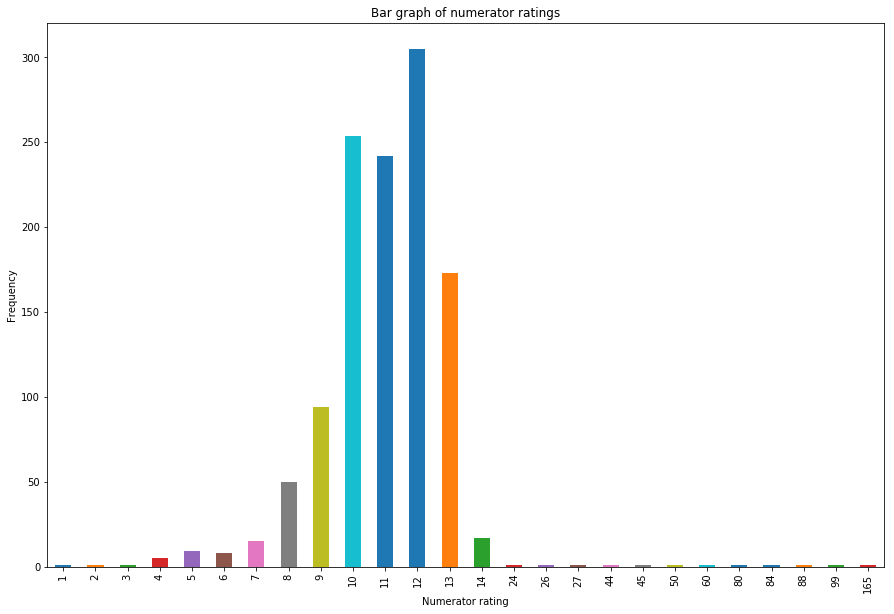

In [43]:
# Bar graph of numerator ratings
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,10))
twitter_archive_master['rating_numerator'].value_counts().sort_index().plot.bar()
plt.title('Bar graph of numerator ratings')
plt.xlabel('Numerator rating')
plt.ylabel('Frequency')
plt.show()

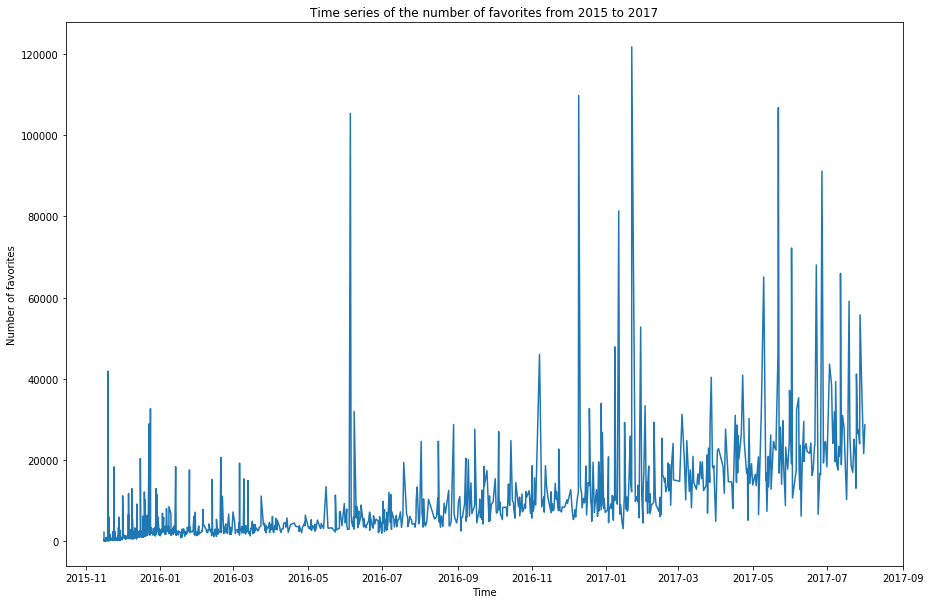

In [44]:
time = twitter_archive_master['timestamp']
retweets = twitter_archive_master['favorite_count']
plt.figure(figsize=(15,10))
plt.plot(time,retweets)
plt.title('Time series of the number of favorites from 2015 to 2017')
plt.xlabel('Time')
plt.ylabel('Number of favorites')
plt.show()